In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Chargement des données
df = pd.read_csv('../data/tweets.csv')

In [8]:
# --- 1. Aperçu général du dataset ---
df.head(-10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7598,10853,NaN,NaN,Father-of-three Lost Control of Car After Over...,1
7599,10854,NaN,NaN,1.3 #Earthquake in 9Km Ssw Of Anza California ...,1
7600,10855,NaN,NaN,Evacuation order lifted for town of Roosevelt:...,1
7601,10859,NaN,NaN,#breaking #LA Refugio oil spill may have been ...,1


In [10]:
df.shape

(7613, 5)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [14]:
# --- 2. Valeurs manquantes et doublons ---
df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
# --- 4. Colonnes utiles ---
colonnes_utiles = ['text', 'target']
df = df[colonnes_utiles]

In [17]:
# --- 5. Vérification des types et contenus ---
df.dtypes

text      object
target     int64
dtype: object

In [18]:
# --- 6. Incohérences : texte vide ou NaN ? ---
textes_vides = df['text'].isna().sum() + (df['text'].str.strip() == '').sum()
print(f"\nNombre de textes vides ou NaN : {textes_vides}")


Nombre de textes vides ou NaN : 0


In [36]:
# --- 7. Analyse des longueurs de texte ---
df['text_length'] = df['text'].astype(str).apply(len)
print("\nStatistiques sur les longueurs de texte :")
df['text_length'].describe()



Statistiques sur les longueurs de texte :


C:\Users\pc\AppData\Local\Temp\ipykernel_9664\2502157142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_length'] = df['text'].astype(str).apply(len)


count    7614.000000
mean      101.024560
std        33.797786
min         3.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: text_length, dtype: float64

In [39]:
df = df.drop(index='text_length', errors='ignore')

In [40]:
print("Nombres de valeurs manquantes dans 'text' :", df['text'].isnull().sum())
print("\nExemples de lignes avec texte manquant :")
print(df[df['text'].isnull()].head())

Nombres de valeurs manquantes dans 'text' : 0

Exemples de lignes avec texte manquant :
Empty DataFrame
Columns: [text, target, text_length]
Index: []


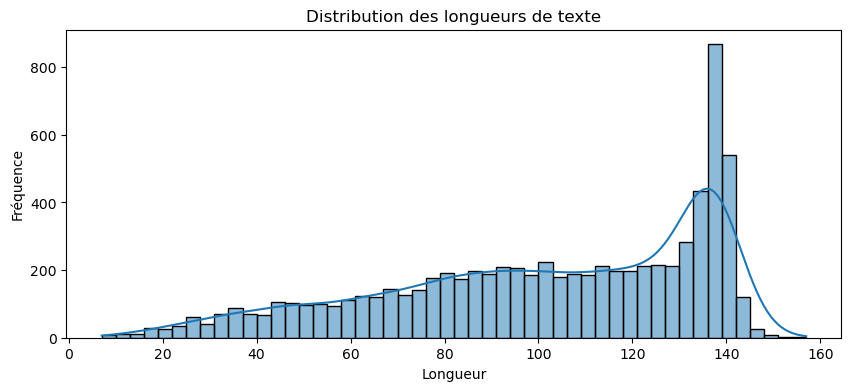

In [41]:
plt.figure(figsize=(10,4))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title("Distribution des longueurs de texte")
plt.xlabel("Longueur")
plt.ylabel("Fréquence")
plt.show()


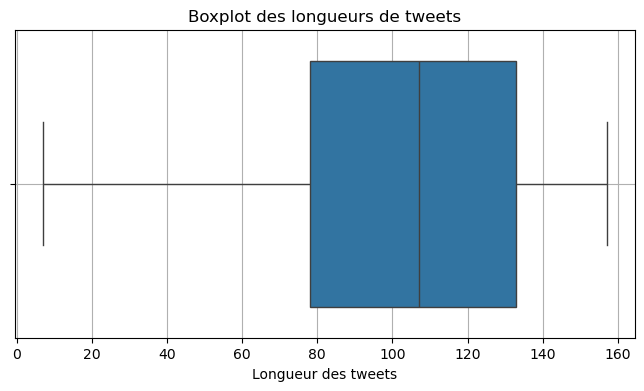

In [42]:
# Ajout de la colonne text_length
#df['text_length'] = df['text'].astype(str).apply(len)

# Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['text_length'])
plt.title("Boxplot des longueurs de tweets")
plt.xlabel("Longueur des tweets")
plt.grid(True)
plt.show()

In [43]:
Q1 = df['text_length'].quantile(0.25)
Q3 = df['text_length'].quantile(0.75)
IQR = Q3 - Q1

# Définir les bornes extrêmes
borne_basse = Q1 - 1.5 * IQR
borne_haute = Q3 + 1.5 * IQR

outliers = df[(df['text_length'] < borne_basse) | (df['text_length'] > borne_haute)]

print(f"\nNombre de tweets outliers (longueurs extrêmes) : {len(outliers)}")
print(outliers[['text', 'text_length', 'target']].head())


Nombre de tweets outliers (longueurs extrêmes) : 0
Empty DataFrame
Columns: [text, text_length, target]
Index: []


In [44]:
# --- 8. Répartition de la variable cible ---
print("\nRépartition de la variable cible (target) :")
print(df['target'].value_counts(normalize=True))


Répartition de la variable cible (target) :
target
0.0    0.57034
1.0    0.42966
Name: proportion, dtype: float64


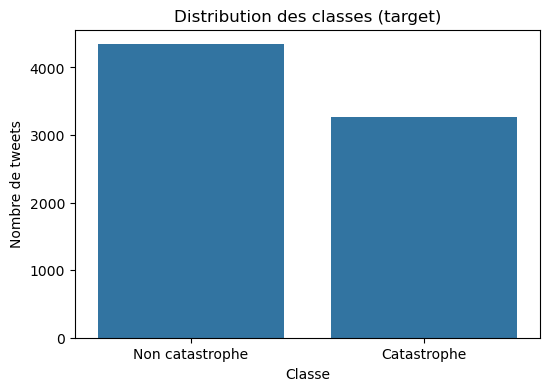

In [45]:
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df)
plt.title("Distribution des classes (target)")
plt.xlabel("Classe")
plt.ylabel("Nombre de tweets")
plt.xticks([0, 1], ['Non catastrophe', 'Catastrophe'])
plt.show()

In [46]:
# --- 9. Tweets aléatoires pour interprétation manuelle ---
print("\nTweets aléatoires (visuellement pour juger la prédictibilité) :")
print(df.sample(5)[['text', 'target']])


Tweets aléatoires (visuellement pour juger la prédictibilité) :
                                                   text  target
4541  http://t.co/qr3YPEkfOe \nSeems they declared w...     1.0
2377  BBC News - India rail crash: Trains derail in ...     1.0
5696  Heroes! A Springer Spaniel &amp; her dog dad r...     1.0
314   @ENews Ben Affleck......I know there's a wife/...     0.0
4553  4 dead dozens injured in Gaza blast near house...     1.0


In [52]:
# --- Cellule : Tests de cohérence EDA ---

print("==== Vérifications de cohérence du dataset ====\n")

# 1. Vérification de la présence et des types des colonnes text et target
assert 'text' in df.columns, "La colonne 'text' est absente"
assert 'target' in df.columns, "La colonne 'target' est absente"
assert df['text'].dtype == object or df['text'].dtype == "string", "Type inattendu pour la colonne 'text'"
assert df['target'].dtype in [int, float], "Type inattendu pour la colonne 'target'"
print("✔️ Colonnes 'text' et 'target' présentes avec types corrects.")

# 2. Détection automatique de valeurs manquantes ou doublons
assert df['text'].isnull().sum() == 0, "Des valeurs manquantes dans 'text'"
assert df['target'].isnull().sum() == 0, "Des valeurs manquantes dans 'target'"
duplicated_rows = df.duplicated().sum()
print(f"✔️ Aucune valeur manquante détectée. {duplicated_rows} doublons détectés.")

# 3. Vérification que tous les textes sont non-vides
assert (df['text'].str.strip().str.len() > 0).all(), "Certains textes sont vides"
print("✔️ Tous les tweets contiennent du texte non vide.")

# 4. Validation du nombre de classes possibles
n_classes = df['target'].nunique()
assert n_classes == 2, f"Nombre de classes inattendu : {n_classes} (attendu : 2)"
print(f"✔️ Nombre de classes dans target : {n_classes} (OK)")

# 5. Test sur les longueurs de texte (moyenne, min, max)
df['text_length'] = df['text'].astype(str).apply(len)
text_length_stats = df['text_length'].describe()[['min', 'mean', 'max']].to_dict()
print(f"✔️ Longueurs de texte - Min : {text_length_stats['min']}, Moyenne : {text_length_stats['mean']:.2f}, Max : {text_length_stats['max']}")

print("\n Tous les tests de cohérence ont été passés avec succès")


==== Vérifications de cohérence du dataset ====

✔️ Colonnes 'text' et 'target' présentes avec types corrects.
✔️ Aucune valeur manquante détectée. 92 doublons détectés.
✔️ Tous les tweets contiennent du texte non vide.
✔️ Nombre de classes dans target : 2 (OK)
✔️ Longueurs de texte - Min : 7.0, Moyenne : 101.04, Max : 157.0

 Tous les tests de cohérence ont été passés avec succès
